# QR factorization

Every $m\times n$ matrix with $m\ge n$ has a factorization $A=QR$, with unitary $m\times m$ $Q$ and upper triangular $m\times n$ $R$. By the triangularity, the span of the first $k$ columns of $Q$ contains the span of the first $k$ columns of $A$. Hence when $m>n$, the first $n$ columns of $Q$ span the entire range of $A$. The "reduced" or "thin" form of the factorization keeps only the first $n$ columns of $Q$ and the first $n$ rows of $R$ to get $A=\hat{Q}\hat{R}$. This is most often what one wants in practice, and is much more efficient when $m\gg n$. 

In MATLAB, the default is to get the full factorization.

In [1]:
A = randi(10,6,4)


A =

     9     3    10     8
    10     6     5    10
     2    10     9     7
    10    10     2     1
     7     2     5     9
     1    10    10    10



In [2]:
[Q,R] = qr(A)


Q =

   -0.4917    0.2328   -0.6065   -0.5446   -0.1808    0.0830
   -0.5464    0.0650    0.1048    0.5508   -0.5609   -0.2613
   -0.1093   -0.6259   -0.1908   -0.1309    0.2001   -0.7090
   -0.5464   -0.2254    0.6638   -0.3649    0.1694    0.2197
   -0.3825    0.2052   -0.2193    0.4377    0.7532    0.0685
   -0.0546   -0.6760   -0.3100    0.2412   -0.1293    0.6076


R =

  -18.3030  -12.6209  -12.1838  -14.6970
         0  -13.7736   -9.1646   -7.0069
         0         0  -10.1275   -9.5502
         0         0         0    6.2205
         0         0         0         0
         0         0         0         0



This can be a bit of a trap. If $m$ is very large, this will consume a lot of time, and much more memory than $A$ itself. Chances are you really want the reduced factorization, which is a different syntax.

In [3]:
[Q,R] = qr(A,0)


Q =

   -0.4917    0.2328   -0.6065   -0.5446
   -0.5464    0.0650    0.1048    0.5508
   -0.1093   -0.6259   -0.1908   -0.1309
   -0.5464   -0.2254    0.6638   -0.3649
   -0.3825    0.2052   -0.2193    0.4377
   -0.0546   -0.6760   -0.3100    0.2412


R =

  -18.3030  -12.6209  -12.1838  -14.6970
         0  -13.7736   -9.1646   -7.0069
         0         0  -10.1275   -9.5502
         0         0         0    6.2205



## Orthogonal polynomials

We're focused on vectors in finite dimensions, but many of the concepts and algorithms can be interpreted more abstractly. In the case of QR factorization, the essence of the matter is to find an orthonormal basis for the space spanned by a given collection of vectors. This requires only linear combination and inner products, both of which extend naturally to vector spaces of functions. In the case of the monomials $1,x,x^2,\ldots$, the orthonormal basis is a famous one: the Legendre polynomials. 

For many purposes, we can create finite-dimensional versions that approach the continuous ones in the limit $m\to\infty$.

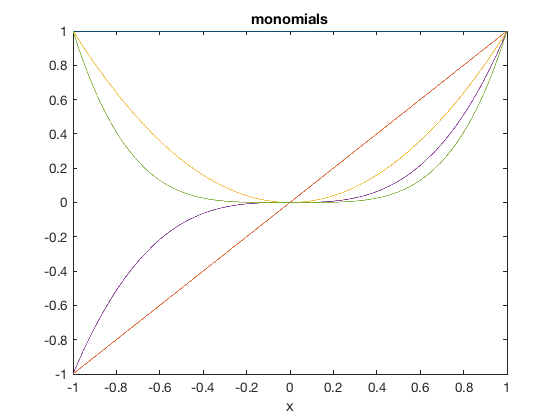

In [2]:
x = (-1:1/1000:1)';
A = x.^(0:4);
plot(x,A);
xlabel("x"); title("monomials");

The monomials are far from an orthogonal basis:

In [3]:
A'*A


ans =

   1.0e+03 *

    2.0010   -0.0000    0.6677    0.0000    0.4010
   -0.0000    0.6677    0.0000    0.4010   -0.0000
    0.6677    0.0000    0.4010         0    0.2867
    0.0000    0.4010         0    0.2867    0.0000
    0.4010   -0.0000    0.2867    0.0000    0.2232



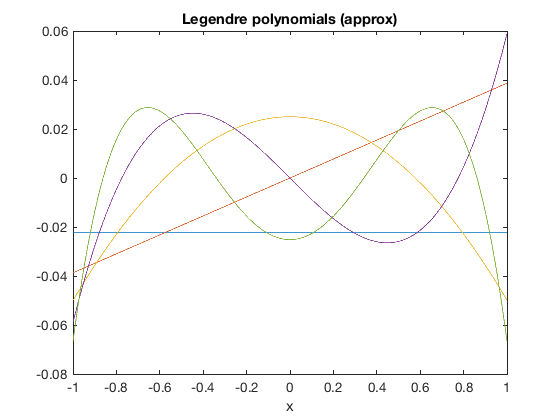

In [4]:
[Q,R] = qr(A,0);
plot(x,Q);
xlabel("x"); title("Legendre polynomials (approx)");